# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target


print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [10]:
print type(newsgroups_test).__name__

Bunch


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
#def P1(num_examples=5):
### STUDENT START ###

for i in range(5):
    print train_labels[i]
    print "\t" + train_data[i]


### STUDENT END ###
#P1(2)

1
	Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
3
	

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.
2
	
 >In article <1993Apr19.020359.26996@sq.sq.com>, ms

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [11]:
#def P2():
### STUDENT START ###

fv1 = CountVectorizer()
tdm1 = fv1.fit_transform(train_data)

print "a."
print "\tThe vocabulary is " + str(tdm1.shape[1]) + " words"
print "\tThere are " +str(tdm1.nnz) + " non-zero entries in the sparse matrix"
print "\tThe average number of non-zero features per example is " + str(float(tdm1.nnz) / tdm1.shape[0])
print "\tThe percent of non-zero entries is " + str(100*float(tdm1.nnz)/(tdm1.shape[0]*tdm1.shape[1])) +"%"

print "b."
feature_names = fv1.get_feature_names()
print "\tThe first and last features are " + feature_names[0] + " and " + feature_names[-1]

print "c."
fv2 = CountVectorizer(vocabulary = ["atheism", "graphics", "space", "religion"])
dtm1 = fv2.transform(train_data)
print "\tThe shape of the DTM is " + str(dtm1.shape)
print "\tThe average of nnz features per example is " + str(float(dtm1.nnz) / dtm1.shape[0])

print "d."
fv3 = CountVectorizer(analyzer = "char_wb", ngram_range = (2,3))
tdm3 = fv3.fit_transform(train_data)
print "\tThe size of the (2,3)gram vocabulary is " + str(tdm3.shape[1])

print "e."
fv4 = CountVectorizer(min_df = 10)
tdm4 = fv4.fit_transform(train_data)
print "\tThe size of the trimmed vocabulary is " + str(tdm4.shape[1])

print "f."
fv5 = CountVectorizer()
tdm5 = fv5.fit_transform(dev_data)
print "\tThere are at least " +str(tdm1.shape[1] - tdm5.shape[1]) + " words in the training set that aren't in the dev set."

### STUDENT END ###

#P2()

a.
	The vocabulary is 26879 words
	There are 196700 non-zero entries in the sparse matrix
	The average number of non-zero features per example is 96.7059980334
	The percent of non-zero entries is 0.359782722696%
b.
	The first and last features are 00 and zyxel
c.
	The shape of the DTM is (2034, 4)
	The average of nnz features per example is 0.268436578171
d.
	The size of the (2,3)gram vocabulary is 28954
e.
	The size of the trimmed vocabulary is 3064
f.
	There are at least 10633 words in the training set that aren't in the dev set.


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

0.428760723622
{'n_neighbors': 200}

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


0.41805566212
{'alpha': 0.02}
0.783038184579
{'C': 0.2}

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


0.705873369398
0.01: 10.593556445
0.02: 21.956254551
0.03: 33.0393219794
0.06: 64.3331854129
0.09: 93.1262746
0.1: 102.26969454
0.2: 184.463190698
0.3: 254.837941548
0.4: 317.218390612
0.5: 373.674537356
0.6: 425.562758435
0.7: 473.821757314
0.8: 518.822415481
0.9: 561.392655267
0.99: 597.635534781
0.999: 600.795779156
0.9999: 601.45122217
1: 601.580895746


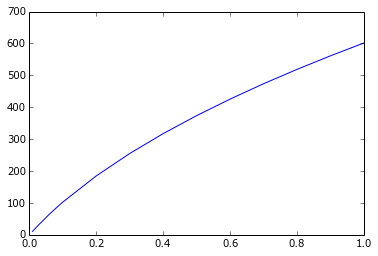

In [80]:
#def P3():
### STUDENT START ###
vocab = CountVectorizer().fit(train_data)
dtm6 = CountVectorizer().fit_transform(train_data)
knn1 = KNeighborsClassifier().fit(dtm6, train_labels)
preds1 = knn1.predict(CountVectorizer(vocabulary = vocab.vocabulary_).transform(dev_data))
print metrics.f1_score(dev_labels, preds1)

knn2 = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": [1,10,50,100,200,300,400,500]})
knn2.fit(dtm6, train_labels)
print knn2.best_params_
preds2 = knn2.predict(CountVectorizer(vocabulary = vocab.vocabulary_).transform(dev_data))
print metrics.f1_score(dev_labels, preds2)

nb1 = MultinomialNB().fit(dtm6, train_labels)
nb2 = GridSearchCV(MultinomialNB(), {'alpha': [0,.01,.02,.03,.06,.09,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99,.999,.9999,1]}).fit(dtm6, train_labels)
print nb2.best_params_
print metrics.f1_score(dev_labels, nb2.predict(CountVectorizer(vocabulary = vocab.vocabulary_).transform(dev_data)))

lr2 = GridSearchCV(LogisticRegression(), {"C": [.01,.02,.03,.06,.09,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99,.999,.9999,1]}).fit(dtm6, train_labels)
print lr2.best_params_
print metrics.f1_score(dev_labels, lr2.predict(CountVectorizer(vocabulary = vocab.vocabulary_).transform(dev_data)))

cs = [.01,.02,.03,.06,.09,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99,.999,.9999,1]
errors = []
for i in cs:
    error = np.sum(LogisticRegression(C = i).fit(dtm6, train_labels).coef_**2)
    print str(i) + ": "+ str(error)
    errors.append(error)

plt.plot(cs,errors)
plt.show()


### STUDENT END ###
#P3()

ANSWER:

a

    NN doesn't perform well probably because a large number of words are common across topics which skews which points are closer in n-space to the test data.  This is probably why the optimal k is so high (200)
b

    Logistic regression only classified along a hyperplane whereas Naive Bayes can classify to as specific a shape as you dare to make it.  The optimal classification boundary is probably not quite linear.
c

    Above is the progression in the sum of squares of weights as C increases.  C is the inverse of the regularization strength, which means that as C increases, a smaller and smaller penalty is applied to larger and larger weights, so the size of the weights increases to fit the data.  The danger is that less regularization/higher weights leads to overfitting.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

[u'atheism', u'religion', u'bobby', u'atheists', u'deletion', u'computer', u'3d', u'file', u'image', u'graphics', u'spacecraft', u'launch', u'nasa', u'orbit', u'space', u'order', u'fbi', u'blood', u'christian', u'christians']
[3866, 20430, 4784, 3870, 7841, 6555, 1145, 10376, 12769, 11552, 22570, 14540, 16697, 17597, 22567, 17609, 10234, 4743, 5901, 5904]
+0.94 +0.95 +0.99 +1.03 +1.12 +0.14 -0.36 -0.33 -0.58 -0.76 -0.36 -0.47 -0.57 -0.41 -1.26 -0.79 -0.31 -0.53 -0.61 -0.74 
-0.41 -0.62 -0.22 -0.10 -0.40 +0.98 +1.12 +1.27 +1.35 +1.94 -0.39 -0.47 -0.48 -0.67 -1.32 -0.08 -0.27 -0.11 -0.42 -0.41 
-0.45 -0.79 -0.34 -0.32 -0.42 -0.68 -0.70 -0.81 -0.83 -1.34 +0.92 +0.94 +1.01 +1.22 +2.16 -0.15 -0.45 -0.32 -0.27 -0.53 
-0.43 -0.06 -0.46 -0.84 -0.40 -0.49 -0.38 -0.63 -0.47 -0.76 -0.38 -0.33 -0.47 -0.63 -1.17 +0.91 +0.91 +1.05 +1.12 +1.15 
80
[[ 0.93960007 -0.41020122 -0.44946533 -0.43445215]
 [ 0.95392077 -0.61686268 -0.79259282 -0.06419343]
 [ 0.9900969  -0.22074996 -0.34077516 -0.46347006]
 [

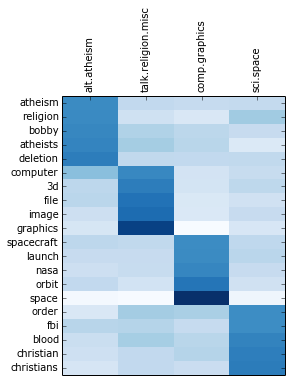

In [167]:
#def P4():
### STUDENT START ###

def make_grid(n):
    
    cv4 = CountVectorizer(ngram_range = (n,n))
    dtm7 = cv4.fit_transform(train_data)
    #print dtm7.get_feature_names()[:100]
    #print dtm7[:10]
    lr4 = LogisticRegression().fit(dtm7, train_labels)
    keywords = []
    features = []
    values = []
    for i in lr4.coef_:
        [features.append(j) for j in np.argsort(i)[-5:]]
        [keywords.append(cv4.get_feature_names()[j]) for j in np.argsort(i)[-5:]]
    #for j in map(lambda j: cv4.get_feature_names()[j], np.argsort(i)[-5:]):
     #   keywords.append(j)
        
    print keywords
    print features
#lr4 = LogisticRegression().fit(train_data, train_label)

    for i in range(len(categories)):
        line = ""#categories[i] + "\t"
        for j in features:
            line = line + "{:+3.2f}".format(lr4.coef_[i][j]) + " "
            values.append(lr4.coef_[i][j])
        print line
    print len(values)
    print np.reshape(values, (20,4), order = "F")
    fig, ax = plt.subplots()
    fig.set_size_inches(4,5)
    ax.pcolor(np.reshape(values, (20,4), order = "F"), cmap=plt.cm.Blues)
    
    ax.set_yticks(np.arange(20) + 0.5, minor=False)
    ax.set_xticks(np.arange(4) + .5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xticklabels(categories)
    ax.set_yticklabels(keywords)
    plt.xticks(rotation = 90)
    plt.show()

make_grid(1)
print ""
print ""
#make_grid(2)

### STUDENT END ###
#P4()

ANSWER:

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [7]:
def empty_preprocessor(s):
    return s

#def better_preprocessor(s):
### STUDENT START ###

### STUDENT END ###

#def P5():
### STUDENT START ###

    
### STUDENT END ###
#P5()

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###

    

    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [11]:
#def P7():
    ### STUDENT START ###



    ### STUDENT END ###
#P7()

ANSWER:

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance